<a href="https://colab.research.google.com/github/Deeksha-M910/Netflix-Subscriptions-Forecasting/blob/main/Netflix_Subscriptions_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#$\color{blue}{\text{Netflix Subscriptions Forecasting}}$

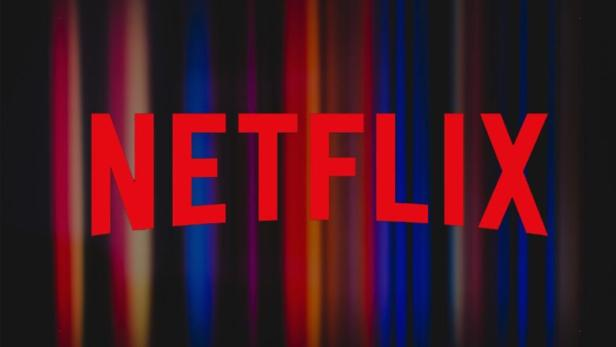

**Project Type** - Time Series Forecasting

# **Project Summary**

**Netflix Subscriptions Forecasting: Process We Can Follow**


Using techniques like time series forecasting, Netflix can estimate the expected number of new subscribers in a given time period and better understand the growth potential of their business. Below is the process we can follow to forecast subscription counts for Netflix:

1. Gather historical Netflix subscriptions growth data
2. Preprocess and clean the data
3. Explore and analyze time series patterns
4. Choose a time series forecasting model (e.g., ARIMA, LSTM)
5. Train the model using the training data
6. Forecast future Netflix subscription counts

So the process for forecasting subscriptions for Netflix starts with collecting a dataset based on the historical growth of Netflix Subscribers.

In the section below, we will go through the task of Netflix subscription forecasting using time series forecasting and the Python programming language.

# **Problem Statement**


In the competitive streaming industry, companies like Netflix want to understand and accurately forecast the number of subscriptions they will achieve over a specific time period. This forecasting is a vital business practice that enables Netflix to plan, strategize, and make data-driven decisions. By enhancing operational efficiency, financial planning, and content strategy, accurate subscription forecasts contribute to Netflix's success and growth in this highly competitive market.

**Features in the dataset:**

* Time Period: Quarterly time period
* Subscribers: Number of subscribers at the end of each quarter

### Import Libraries

Let’s start this task by importing the necessary Python libraries and the dataset:

In [ ]:
# Importing Necessay Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Dataset Loading

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/Netflix Subscriptions Forecasting/Netflix-Subscriptions.csv')
print(data.head())

  Time Period  Subscribers
0  01/04/2013     34240000
1  01/07/2013     35640000
2  01/10/2013     38010000
3  01/01/2014     41430000
4  01/04/2014     46130000


### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


The dataset contains subscription counts of Netflix at the start of each quarter from 2013 to 2023. Before moving forward, let’s convert the Time Period column into a datetime format:

In [ ]:
data['Time Period'] = pd.to_datetime(data['Time Period'], format='%d/%m/%Y')
print(data.head())

  Time Period  Subscribers
0  2013-04-01     34240000
1  2013-07-01     35640000
2  2013-10-01     38010000
3  2014-01-01     41430000
4  2014-04-01     46130000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Period  42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 800.0 bytes


Now let’s have a look at the quarterly subscription growth of Netflix:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Time Period'],
                         y=data['Subscribers'],
                         mode='lines', name='Subscribers'))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth',
                  xaxis_title='Date',
                  yaxis_title='Netflix Subscriptions')
fig.show()

In the above graph, we can see that the growth of Netflix subscribers is not seasonal. So we can use a forecasting technique like ARIMA in this dataset.

Now let’s have a look at the quarterly growth rate of subscribers at Netflix:

In [ ]:
# Calculate the quarterly growth rate
data['Quarterly Growth Rate'] = data['Subscribers'].pct_change() * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = data['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Time Period'],
    y=data['Quarterly Growth Rate'],
    marker_color=data['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()

Now let’s have a look at the yearly growth rate:

In [ ]:
# Calculate the yearly growth rate
data['Year'] = data['Time Period'].dt.year
yearly_growth = data.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

# Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Year'],
    y=yearly_growth,
    marker_color=data['Bar Color'],
    name='Yearly Growth Rate'
))
fig.update_layout(title='Netflix Yearly Subscriber Growth Rate',
                  xaxis_title='Year',
                  yaxis_title='Yearly Growth Rate (%)')
fig.show()

**Using ARIMA for Forecasting Netflix Quarterly Subscriptions**

Now let’s get started with Time Series Forecasting using ARIMA to forecast the number of subscriptions of Netflix using Python. I will start by converting the data into a time series format:

In [ ]:
time_series = data.set_index('Time Period')['Subscribers']

Here we are converting the original DataFrame into a time series format, where the Time Period column becomes the index, and the Subscribers column becomes the data.

Now let’s find the value of p and q by plotting the ACF and PACF of differenced time series:

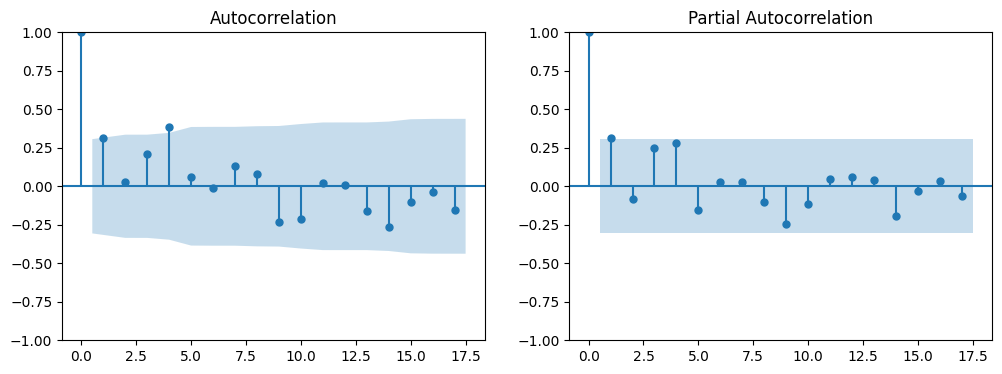

In [ ]:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Here we first calculated the differenced time series from the original time_series, removed any NaN values resulting from the differencing, and then plotted the ACF and PACF to provide insights into the potential order of the AR and MA components in the time series. These plots are useful for determining the appropriate parameters when using the ARIMA model for time series forecasting.

Based on the plots, we find that p=1 and q=1. The ACF plot cuts off at lag 1, indicating q=1, and the PACF plot also cuts off at lag 1, indicating p=1. As there is a linear trend in the subscription growth rate, we can set the value of d as 1 to remove the linear trend, making the time series stationary.

Now here’s how to use the ARIMA model on our data:

In [ ]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Wed, 24 Jul 2024   AIC                           1351.986
Time:                        15:45:13   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.765      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

Now here’s how to make predictions using the trained model to forecast the number of subscribers for the next five quarters:

In [ ]:
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
predictions

2023-10-01    243321458
2024-01-01    248251648
2024-04-01    253180570
2024-07-01    258108224
2024-10-01    263034611
Freq: QS-OCT, Name: predicted_mean, dtype: int64

Now let’s visualize the results of Netflix Subscriptions Forecasting for the next five quarters:

In [ ]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='Netflix Quarterly Subscription Predictions',
                  xaxis_title='Time Period',
                  yaxis_title='Subscribers',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

So this is how we can forecast subscription counts for a given time period using Time Series Forecasting and Python.

**Summary**

Using techniques like time series forecasting, Netflix can estimate the expected number of new subscribers in a given time period and better understand the growth potential of their business. It enhances operational efficiency, financial planning, and content strategy, ultimately contributing to their success and growth in the highly competitive streaming industry.